**CSCI4840-Fall 2023 LAB2**
**Objective:**

The objective of this lab is to provide students with hands-on experience in implementing, training, and evaluating classification models in machine learning, with a specific emphasis on comparing and analyzing different models

**Learning Outcomes:**

* 1. Understand Classification Algorithms: By the end of the lab, students should be able to explain the fundamental concepts behind different classification algorithms.
* 2. Compare and Analyze Different Models: Students should be proficient in comparing and analyzing the performance of different classification models. This includes evaluating how various models perform on the same dataset and identifying the reasons behind the differences in performance.
* 3. Implementing Classification Models: Students should be able to implement classification models using popular machine learning libraries (e.g., scikit-learn in Python), including creating a training and testing dataset, training models, and making predictions.
* 4. Model Evaluation: Understand and apply various evaluation metrics for classification, including accuracy, precision, recall, F1-score. Students should be able to interpret these metrics and make informed decisions based on model performance.
* 5. Problem-Solving Skills: Develop problem-solving skills in the context of classification, including troubleshooting errors, debugging code, and experimenting with different techniques. Compare and analyze solutions to problems encountered with different models. 

**Remark:** 
* 1.this lab is an individual work, please show your own understanding and effort. 
* 2.All answers are expected to be python code by default. You can use markdown box to add illustration if there is a need

**Data Set**
The dataset used in this lab is stored in testData.csv. The data set is a modified data set based on Stroke Prediction competition on Kaggle. 
Stroke:0 = no stroke, 1 = stroke


**Q1 (5 points): **
1. load the data from heart.csv
2. check detailed information of the dataset using info function
3. check the first 10 records to get a better idea about the data
4. check if there are NaN values, remove records with NaN value if present
5. check the number of target values to verify whether it is a binary classification problem or multiclass classification

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.utils import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("testData.xls")
print(data.info())
print(data.head(10))
clndata = data.dropna()
print('Binary Classification' if len(np.unique(clndata.iloc[:,-1])) == 2 else 'Multiclass Classification')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31811 entries, 0 to 31810
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            31811 non-null  int64  
 1   Age                   31811 non-null  float64
 2   Sex                   31777 non-null  float64
 3   HighChol              31778 non-null  float64
 4   CholCheck             31771 non-null  float64
 5   BMI                   31778 non-null  float64
 6   Smoker                31786 non-null  float64
 7   HeartDiseaseorAttack  31780 non-null  float64
 8   PhysActivity          31784 non-null  float64
 9   Fruits                31780 non-null  float64
 10  Veggies               31775 non-null  float64
 11  HvyAlcoholConsump     31782 non-null  float64
 12  GenHlth               31780 non-null  float64
 13  MentHlth              31769 non-null  float64
 14  PhysHlth              31785 non-null  float64
 15  DiffWalk           

**Q2 (3 points): **
1. Use a random generator to select two different features from the fearture set
2. Utilize a py plot to assess the distribution of the target value, similar to our practice in previous classes, in order to determine the separation quality among different classes

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Feature Column 1 =  13
Feature Column 2 =  1


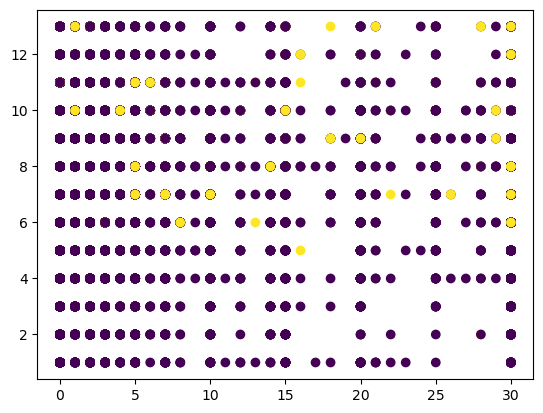

In [3]:
ind1 = np.random.randint(1, len(clndata.iloc[0]) - 1)
ind2 = np.random.randint(1, len(clndata.iloc[0]) - 1)
while ind1 == ind2:
    ind2 = np.random.randint(1, len(clndata.iloc[0] - 1))

featdata = clndata.iloc[:, [ind1, ind2, -1]]
print('Feature Column 1 = ', ind1)
print('Feature Column 2 = ', ind2)

plt.scatter(featdata.iloc[:, 0], featdata.iloc[:, 1], c = featdata.iloc[:, 2], marker = 'o')

In [4]:
#sns.pairplot(clndata, hue = "Stroke")

**Q3 (3 points): **
split the dataset into train set (80%) and test set(20%) based on the target value. 

In [5]:
x = clndata.iloc[:, [ind1, ind2]]
y = clndata.iloc[:, -1]

scaler.fit(x)

X = pd.DataFrame(scaler.transform(x))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size = 0.2, stratify = y)

*************************************************************************************************
This box is used as a separation box
*************************************************************************************************

**Q4 (5 points): **
1. Employ logistic regression to train the training dataset.
2. Apply the trained model to make predictions for the target variable in the test dataset.
3. Utilize a classification report to evaluate and assess the model's performance.

In [6]:
logR_model = LogisticRegression(random_state = 10, max_iter = 2000)
logR_model.fit(X_train, y_train)
print(logR_model.score(X_test, y_test))

0.9373705179282869


In [7]:
y_pred = logR_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

[[5882    0]
 [ 393    0]]


In [8]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      5882
         1.0       0.00      0.00      0.00       393

    accuracy                           0.94      6275
   macro avg       0.47      0.50      0.48      6275
weighted avg       0.88      0.94      0.91      6275



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*************************************************************************************************
This box is used as a separation box
*************************************************************************************************

**Q5 (5 points): **
1. Employ SVM to train the training dataset.
2. Apply the trained model to make predictions for the target variable in the test dataset.
3. Utilize a classification report to evaluate and assess the model's performance.

In [9]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [10]:
print(metrics.accuracy_score(y_test, y_pred))

0.9373705179282869


In [11]:
print(metrics.confusion_matrix(y_test, y_pred))

[[5882    0]
 [ 393    0]]


In [12]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      5882
         1.0       0.00      0.00      0.00       393

    accuracy                           0.94      6275
   macro avg       0.47      0.50      0.48      6275
weighted avg       0.88      0.94      0.91      6275



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Q6 (5 points): **
Utilize GridSearchCV to try different kernel and different parameters to see if you are able to improve the performance. Which kernel and parameter combination provides the best accracy score?

In [13]:
param_grid = {'C':[.1, 1, 10], 'kernel':['linear', 'rbf'], 'gamma':[.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid, scoring = 'accuracy', verbose = 1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [14]:
print(metrics.accuracy_score(y_test, y_pred))

0.9373705179282869


In [15]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [16]:
print(metrics.confusion_matrix(y_test, y_pred))

[[5882    0]
 [ 393    0]]


In [17]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      6275
         1.0       0.00      0.00      0.00         0

    accuracy                           0.94      6275
   macro avg       0.50      0.47      0.48      6275
weighted avg       1.00      0.94      0.97      6275



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*************************************************************************************************
This box is used as a separation box
*************************************************************************************************

**Q7 (5 points): **
1. Employ decision tree to train the training dataset.
2. Apply the trained model to make predictions for the target variable in the test dataset.
3. Utilize a classification report to evaluate and assess the model's performance.

[Text(0.4582241524327122, 0.9666666666666667, 'x[1] <= -0.38\ngini = 0.118\nsamples = 25098\nvalue = [23524, 1574]'),
 Text(0.24285067287784678, 0.9, 'x[0] <= 2.662\ngini = 0.049\nsamples = 7915\nvalue = [7718, 197]'),
 Text(0.16893115942028986, 0.8333333333333334, 'x[1] <= -0.731\ngini = 0.038\nsamples = 7314\nvalue = [7173, 141]'),
 Text(0.0790631469979296, 0.7666666666666667, 'x[0] <= -0.157\ngini = 0.024\nsamples = 5125\nvalue = [5063, 62]'),
 Text(0.027432712215320912, 0.7, 'x[1] <= -2.136\ngini = 0.017\nsamples = 3789\nvalue = [3757, 32]'),
 Text(0.012422360248447204, 0.6333333333333333, 'x[1] <= -2.488\ngini = 0.004\nsamples = 553\nvalue = [552, 1]'),
 Text(0.008281573498964804, 0.5666666666666667, 'x[0] <= -0.402\ngini = 0.009\nsamples = 217\nvalue = [216, 1]'),
 Text(0.004140786749482402, 0.5, 'gini = 0.011\nsamples = 182\nvalue = [181, 1]'),
 Text(0.012422360248447204, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.016563146997929608, 0.5666666666666667, 'gini = 0

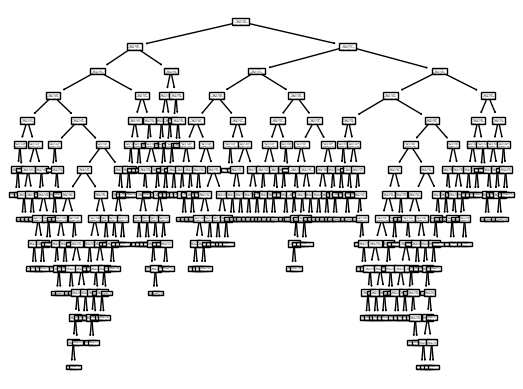

In [18]:
clf = DecisionTreeClassifier()
descTree = clf.fit(X_train, y_train)
plot_tree(descTree)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
print(metrics.accuracy_score(y_test, y_pred))

0.9367330677290837


In [21]:
print(metrics.confusion_matrix(y_test, y_pred))

[[5878    4]
 [ 393    0]]


In [22]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      5882
         1.0       0.00      0.00      0.00       393

    accuracy                           0.94      6275
   macro avg       0.47      0.50      0.48      6275
weighted avg       0.88      0.94      0.91      6275



**Q8 (3 points): **
try random forest to see if it can improve the performance
1. Employ random forest to train the training dataset.
2. Apply the trained model to make predictions for the target variable in the test dataset.
3. Utilize a classification report to evaluate and assess the model's performance.

In [23]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print(metrics.accuracy_score(y_test, y_pred))

0.9370517928286852


In [26]:
print(metrics.confusion_matrix(y_test, y_pred))

[[5880    2]
 [ 393    0]]


In [27]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      5882
         1.0       0.00      0.00      0.00       393

    accuracy                           0.94      6275
   macro avg       0.47      0.50      0.48      6275
weighted avg       0.88      0.94      0.91      6275



*************************************************************************************************
This box is used as a separation box
*************************************************************************************************

**Q9 (5 points): **
1. Employ KNN to train the training dataset.
2. Apply the trained model to make predictions for the target variable in the test dataset. 
3. Utilize a classification report to evaluate and assess the model's performance.
4. Try different K and chose the one with the best performance

In [28]:
error_rate = []
for i in range(1, 40):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Error Rate')

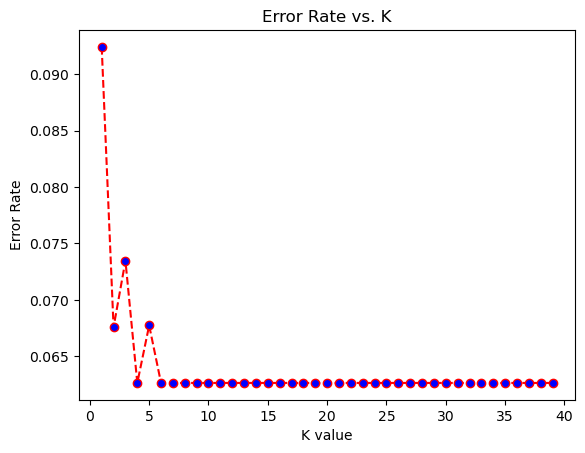

In [29]:
plt.plot(range(1, 40), error_rate, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue')
plt.title("Error Rate vs. K")
plt.xlabel("K value")
plt.ylabel("Error Rate")

In [40]:
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [41]:
print(metrics.accuracy_score(y_test, y_pred))

0.9373705179282869


In [42]:
print(metrics.confusion_matrix(y_test, y_pred))

[[5882    0]
 [ 393    0]]


In [43]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      5882
         1.0       0.00      0.00      0.00       393

    accuracy                           0.94      6275
   macro avg       0.47      0.50      0.48      6275
weighted avg       0.88      0.94      0.91      6275



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Q10 (3 points)**
Based on your experiment, choose the y_pred from the model with the highest accuracy. Use a scatter plot to show the actual target and the predict target.So that we can see the accuracy from the visualization

As the results from every single algorithm is the exact same, that every single test item was classified as "NO STROKE," the plot would not be very helpful. That said:

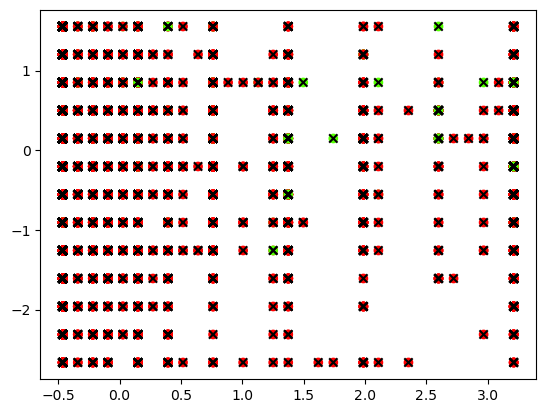

In [51]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = y_test.iloc[:], cmap = 'prism', marker = 'o')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = y_pred[:], cmap = 'cubehelix', marker = 'x')

**Q11 (5 points): **
List three observation or extended analysis based on the experiment result such as compare two models, why one's performance is better than the other or similar to the other for the given dataset. You may want to run the experiment for multiple times to check the performance of different train and test set

Overall, the data for this assignment is not very good or clean to use, as the target results are heavily mixed together throughout, and there are several columns that are strictly binary, thus resulting in many pairs of data choices only allowing for 4 nodes, which would be completely impossible to clearly deliniate final targets. Overall, every single algorithm had almost the exact same results, varying by only hundreths of a point. Even more telling, is that every single one had the identical confusion matrix, where the prediction outcomes were 100% no stroke, when based off of 2 inputs. That said, if more columns were used, I would expect that the DecisionTree / Forest or the GridSearch (using one of the higher dimension kernals) would produce very clean results, however, that is very much outside the scope of this assignment.

**Good job, you are done!**